In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

PG = yf.download('PG', start = '1995-01-01')

[*********************100%%**********************]  1 of 1 completed


In [2]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.529932,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.469570,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.363943,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.379033,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.348852,1795200


# Simple rate of return

In [3]:
PG['Simple_Return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1) ) - 1
PG['Simple_Return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2024-07-01   -0.013340
2024-07-02    0.007252
2024-07-03   -0.000427
2024-07-05    0.008423
2024-07-08    0.007929
Name: Simple_Return, Length: 7429, dtype: float64

<Axes: xlabel='Date'>

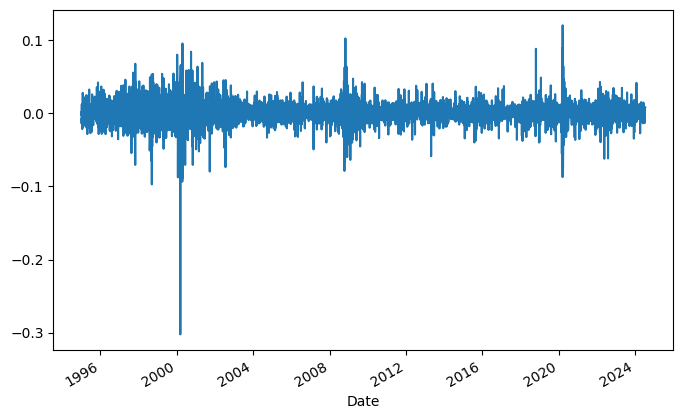

In [4]:
PG['Simple_Return'].plot(figsize = (8,5))

In [5]:
agv_return_daily = PG['Simple_Return'].mean()
agv_return_daily

0.0005138334378322598

In [6]:
agv_return_anually = PG['Simple_Return'].mean()  * 250
agv_return_anually

0.12845835945806494

In [7]:
print(str(round(agv_return_anually , 5) *100) + '%')

12.845999999999998%


# Log Return

In [8]:
PG['Log_Return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1) ) 
PG['Log_Return']

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2024-07-01   -0.013430
2024-07-02    0.007226
2024-07-03   -0.000427
2024-07-05    0.008388
2024-07-08    0.007898
Name: Log_Return, Length: 7429, dtype: float64

<Axes: xlabel='Date'>

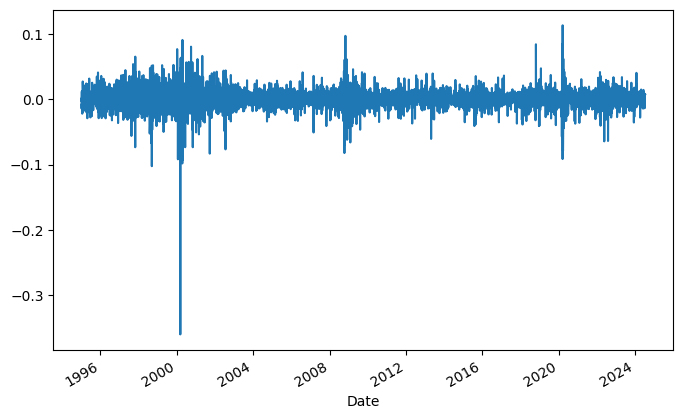

In [9]:
PG['Log_Return'].plot(figsize = (8,5))

In [10]:
agv_return_daily = PG['Log_Return'].mean()
agv_return_daily

0.0004168321801054557

In [11]:
agv_return_anually = PG['Log_Return'].mean()  * 250
agv_return_anually

0.10420804502636392

In [12]:
print(str(round(agv_return_anually , 5) *100) + '%')

10.421%


# Annual return with multiple stocks

In [13]:
tickers = ['PG' , 'MSFT' , 'F' , 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] =  yf.download(t, start = '1995-01-01' , end = '2016-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
mydata

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.529931,2.323633,3.674592,20.297825
1995-01-04,7.469572,2.340523,3.773459,20.297825
1995-01-05,7.363943,2.301917,3.740505,20.347586
1995-01-06,7.379032,2.340523,3.740505,20.248085
1995-01-09,7.348853,2.326046,3.806415,20.049086
...,...,...,...,...
2015-12-24,62.949085,49.291809,9.141677,131.936493
2015-12-28,63.051662,49.539715,9.058629,132.236069
2015-12-29,63.398785,50.070965,9.090570,133.862259


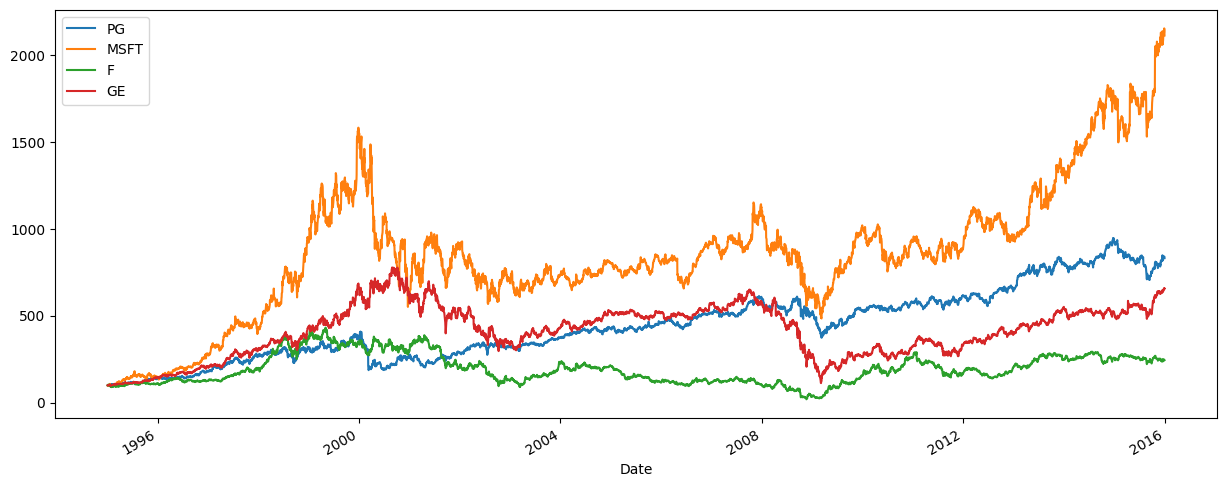

In [15]:
# Normalization to 100%
((mydata / mydata.iloc[0]) *100).plot(figsize = (15,6))
plt.show()

# Calculating Return of a Portfolio

In [16]:
Return  = (mydata / mydata.shift(1)) - 1

In [17]:
Return.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002452
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [18]:
Weights = np.array([0.25 , 0.25 , 0.25 , 0.25])

In [19]:
annual_return = Return.mean() * 250
annual_return

PG      0.127150
MSFT    0.197051
F       0.127494
GE      0.133686
dtype: float64

In [20]:
p_folio_1 = str(round(np.dot(annual_return, Weights) , 5) * 100) + '%'
p_folio_1

'14.635000000000002%'

In [21]:
Weights = np.array([0.40 , 0.40 , 0.15 , 0.05])
p_folio_2 = str(round(np.dot(annual_return, Weights) , 5) * 100) + '%'

print(p_folio_1 , p_folio_2)

14.635000000000002% 15.549%


# Calculating the return of indices

In [22]:
tickers = ['^GSPC' , '^IXIC' , '^GDAXI' , '^FTSE']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] =  yf.download(t, start = '1995-01-01' , end = '2016-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


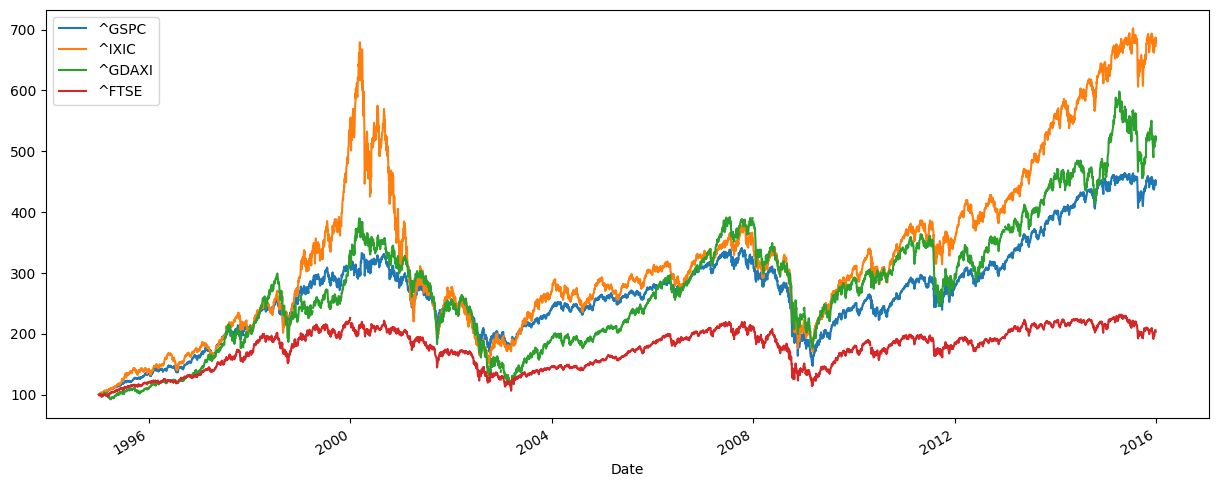

In [23]:
# Normalization to 100%
((ind_data / ind_data.iloc[0]) *100).plot(figsize = (15,6))
plt.show()

In [24]:
ind_return  = (ind_data / ind_data.shift(1)) - 1

In [25]:
annual_return = ind_return.mean() * 250
annual_return

^GSPC     0.088890
^IXIC     0.122011
^GDAXI    0.090725
^FTSE     0.046740
dtype: float64

In [26]:
tickers = ['PG' , '^GSPC' , '^DJI' ]
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] =  yf.download(t, start = '1995-01-01' , end = '2016-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


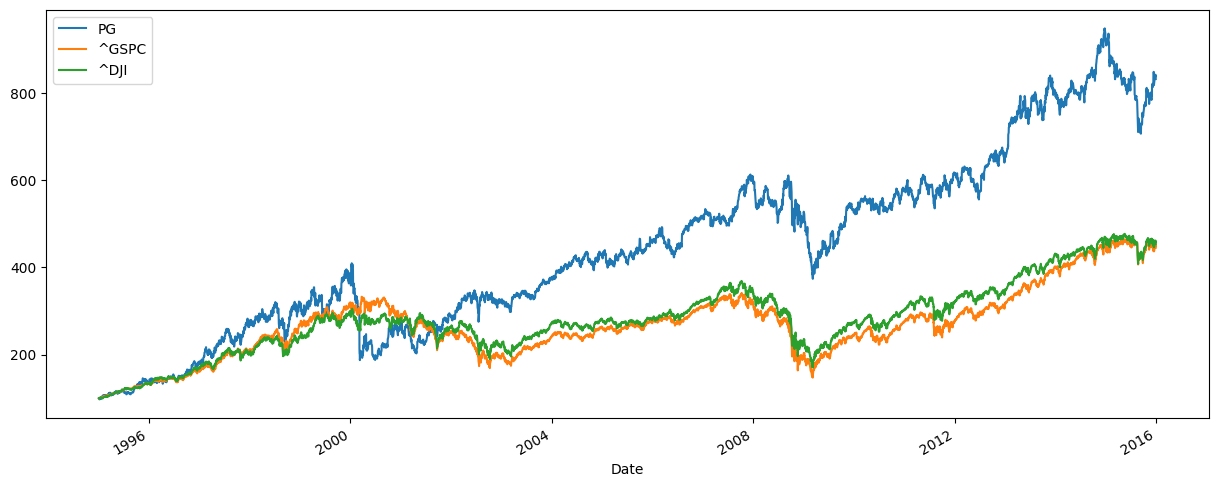

In [27]:
# Normalization to 100%
((data_2 / data_2.iloc[0]) *100).plot(figsize = (15,6))
plt.show()

# Calculatin the security of the risk

In [28]:
tickers = ['PG' , 'BEI.DE']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] =  yf.download(t, start = '2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
sec_return = np.log(sec_data / sec_data.shift(1))
sec_return.head()

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002203,0.000202
2007-01-09,-0.002518,-0.022858


# PG

In [30]:
sec_return['PG'].mean()

0.0003290013688780007

In [31]:
sec_return['PG'].mean() * 250

0.08225034221950019

In [32]:
sec_return['PG'].std()

0.011635571357653375

In [33]:
sec_return['PG'].std() * 250 ** 0.5

0.18397453683801163

# BEI.DE

In [34]:
sec_return['BEI.DE'].mean()

0.0002636284775247832

In [35]:
sec_return['BEI.DE'].mean() * 250

0.0659071193811958

In [36]:
sec_return['BEI.DE'].std()

0.01347729054609182

In [37]:
sec_return['BEI.DE'].std() * 250 ** 0.5

0.2130946740675233

In [38]:
sec_return[['PG', 'BEI.DE']].mean() * 250 , sec_return[['PG', 'BEI.DE']].std() * 250 ** 0.5

(PG        0.082250
 BEI.DE    0.065907
 dtype: float64,
 PG        0.183975
 BEI.DE    0.213095
 dtype: float64)

# Covariance and Correlation

In [39]:
cov_matrix = sec_return.cov()
cov_matrix

,PG,BEI.DE
PG,0.000135,0.000042
BEI.DE,0.000042,0.000182


In [40]:
cov_matrix = sec_return.cov() *250
cov_matrix

,PG,BEI.DE
PG,0.033847,0.010567
BEI.DE,0.010567,0.045409


In [41]:
cov_matrix = sec_return.corr()
cov_matrix

,PG,BEI.DE
PG,1.000000,0.269004
BEI.DE,0.269004,1.000000


# Calculating Portfolio risk

Equal Weight scheme

In [42]:
weights = np.array([0.5, 0.5])

Portfolio variance

In [43]:
pfolio_var = np.dot(weights.T, np.dot(sec_return.cov() * 250 , weights))
pfolio_var

0.025097591842347645

Portfolio volatility

In [44]:
pfolio_vol = np.dot(weights.T, np.dot(sec_return.cov() * 250 , weights)) ** 0.5
pfolio_vol

0.15842219491708745

In [45]:
print(str(round(pfolio_vol, 5) * 100) + '%')

15.842%


# Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

In [46]:
weights = np.array([0.5, 0.5])

Diversifiable Risk

In [47]:
PG_var_a = sec_return['PG'].var() * 250
BEIDE_var_a = sec_return['BEI.DE'].var() * 250
print(PG_var_a , BEIDE_var_a)

0.0338466302047609 0.04540934011594398


In [48]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEIDE_var_a) 
dr

0.005283599262171427

In [49]:
print(str(round(dr, 5) * 100) + '%')

0.528%


Non-Diversifiable Risk

In [50]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.01981399258017622

In [51]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEIDE_var_a) 
n_dr_2

0.019813992580176222

In [52]:
n_dr_1 == n_dr_2

False

# Running a regression in python

In [53]:
data  = pd.read_excel(r'C:\Users\diptiwar\Desktop\Time Series\Finance Data\Housing.xlsx')

In [54]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [55]:
data[['House Price' , 'House Size (sq.ft.)']].head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


Univariate Analysis

In [56]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

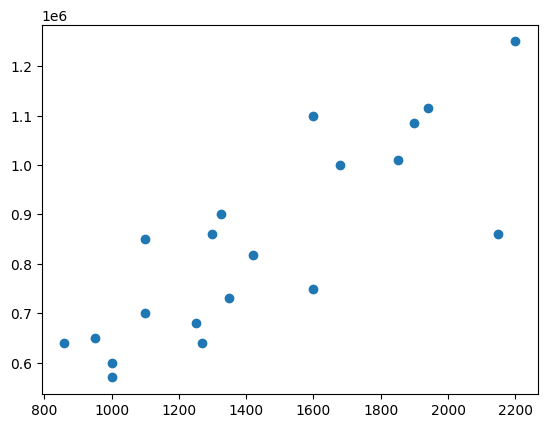

In [57]:
plt.scatter(X, Y)
plt.show()

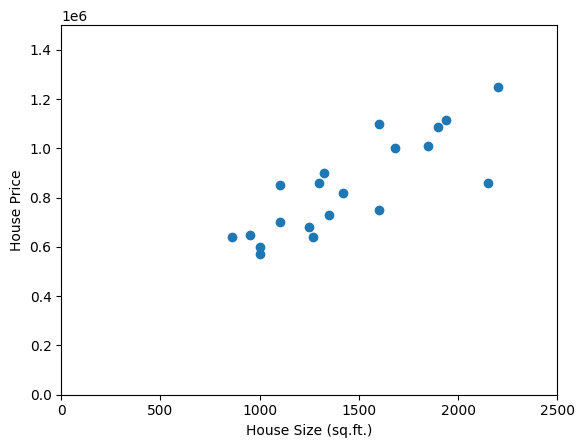

In [58]:
plt.scatter(X, Y)
plt.axis([0, 2500 , 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft.)')
plt.show()

# Ordinary Least square regression

In [59]:
import statsmodels.api as sm

In [60]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [61]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           8.13e-06
Time:                        13:05:24   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Important Intake

Note:
1. alpha  : 2.608e+05  , It is the y-intercept . It can also be read as the house pricing start from 2.608e+05 dollar.
2. Beta : 401.9163 , It is the slope of the line . It can also be read as for every increase in House Size (sq.ft.) , there would be increse of 401.9163 dollar.
3. std err : 65.243 , it can be read as the there would be the varince in slope by 65.243 for every 401.9163

# Obtaining the effecient Frontier in python

In [62]:
tickers = ['PG' , '^GSPC']
pf_data = pd.DataFrame()
for t in tickers:
    pf_data[t] =  yf.download(t, start = '2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


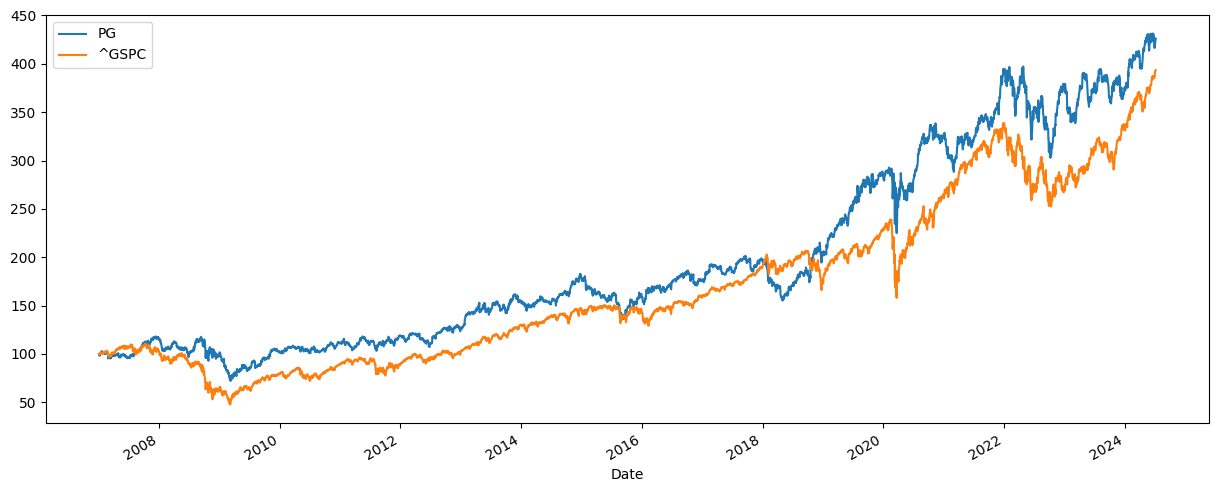

In [63]:
# Normalization to 100%
((pf_data / pf_data.iloc[0]) *100).plot(figsize = (15,6))
plt.show()

In [64]:
pf_data = np.log(pf_data / pf_data.shift(1) ) 
pf_data.head()

,PG,^GSPC
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.001228
2007-01-05,-0.008624,-0.006103
2007-01-08,0.002202,0.002218
2007-01-09,-0.002518,-0.000517


In [65]:
pf_data.mean() * 250


PG       0.082250
^GSPC    0.077715
dtype: float64

In [66]:
pf_data.cov() * 250


,PG,^GSPC
PG,0.033847,0.022557
^GSPC,0.022557,0.040087


In [67]:
pf_data.corr() 


,PG,^GSPC
PG,1.000000,0.612389
^GSPC,0.612389,1.000000


In [68]:
# Number of stocks
num_assets = 2
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.87537692, 0.12462308])

Expected Portfolio return

In [69]:
np.sum(weights * pf_data.mean()) *250

0.08168512343808956

Expected portfolio Variance

In [70]:
pfolio_var = np.dot(weights.T, np.dot(pf_data.cov() * 250 , weights))
pfolio_var

0.0314803859538666

Expected portfolio volatility

In [71]:
pfolio_vol = np.dot(weights.T, np.dot(pf_data.cov() * 250 , weights)) ** 0.5
pfolio_vol

0.1774271285735826

In [72]:
pfolio_returns = []
pfolio_volatilities = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * pf_data.mean()) *250)
    pfolio_volatilities.append(np.dot(weights.T, np.dot(pf_data.cov() * 250 , weights)) ** 0.5)
    
pfolio_returns  = np.array(pfolio_returns) 
pfolio_volatilities = np.array(pfolio_volatilities)

In [73]:
portfolios = pd.DataFrame({'Return' : pfolio_returns , 'volatilities' : pfolio_volatilities})

In [74]:
portfolios.head()

,Return,volatilities
0,0.079766,0.173567
1,0.077854,0.197579
2,0.080377,0.171573
3,0.079976,0.172545
4,0.080161,0.171933


Text(0, 0.5, 'Expected Return')

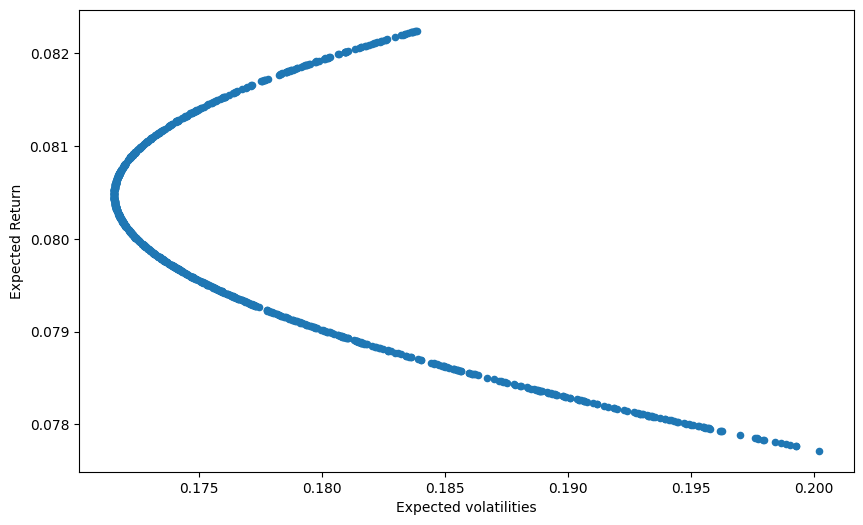

In [75]:
portfolios.plot(x = 'volatilities', y = 'Return' , kind = 'scatter' , figsize = (10, 6))
plt.xlabel('Expected volatilities')
plt.ylabel('Expected Return')

# Calculating the Beta of the stocks 

In [76]:
tickers = ['PG' , '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] =  yf.download(t, start = '2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [77]:
sec_return = np.log(data / data.shift(1) ) 
sec_return.head()

,PG,^GSPC
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.001228
2007-01-05,-0.008624,-0.006103
2007-01-08,0.002202,0.002218
2007-01-09,-0.002518,-0.000517


In [78]:
cov = sec_return.cov() * 250
cov

,PG,^GSPC
PG,0.033847,0.022557
^GSPC,0.022557,0.040087


In [79]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.022557294118058777

In [80]:
market_var = sec_return['^GSPC'].var() * 250
market_var

0.040087101089741464

In [81]:
# If Beta = 0 then No relationship
# If Beta < 1 then Defensive , It means it less like to get affected by the market down
# If Beta > 1 then Aggresive , It means it more like to get affected by the market down

#finding Beta for PG
PG_beta = cov_with_market / market_var
PG_beta

0.5627070430351305

# Calculate the Expected Return of P&G

                           r(pg) = Risk free (Rf) + PG_beta * ( Market risk (Rm) - Risk free (Rf)) 

In [82]:
PG_CAPM = 0.0785 + PG_beta * (0.0795 - 0.0785)
PG_CAPM

0.07906270704303513

# Sharpe Ratio 

              Sharpe = ( r(pg) - Risk free (Rf) ) / Std of PG

In [83]:
Sharpe = ( PG_CAPM - 0.0785) / (sec_return['PG'].var() * 250 ** 0.5 )
Sharpe

0.2628676063376056

# Running Multivariate Regression in Python

In [84]:
data  = pd.read_excel(r'C:\Users\diptiwar\Desktop\Time Series\Finance Data\Housing.xlsx')

In [85]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [86]:
X  = data[[ 'House Size (sq.ft.)' , 'Number of Rooms' , 'Year of Construction' ]]
Y =  data['House Price']

In [87]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [88]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           6.82e-05
Time:                        13:05:28   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
X  = data[[ 'House Size (sq.ft.)' , 'Number of Rooms' ]]
Y =  data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.77e-05
Time:                        13:05:28   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
X  = data[[ 'House Size (sq.ft.)' , 'Year of Construction' ]]
Y =  data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.26e-05
Time:                        13:05:28   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Monte Carlo predicting Gross profit 

In [91]:
rev_mean  = 170
rev_std =   20
iteration = 1000

In [92]:
rev = np.random.normal(rev_mean, rev_std , iteration)

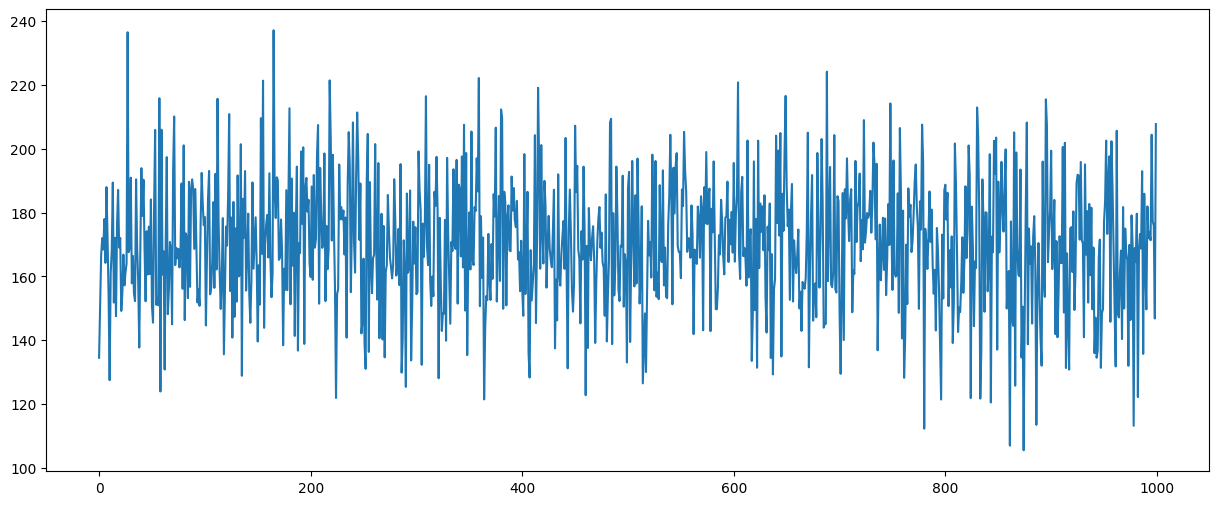

In [93]:
plt.figure(figsize = (15, 6))
plt.plot(rev)
plt.show()

In [94]:
COGS = - ( rev * np.random.normal(0.6, 0.1))

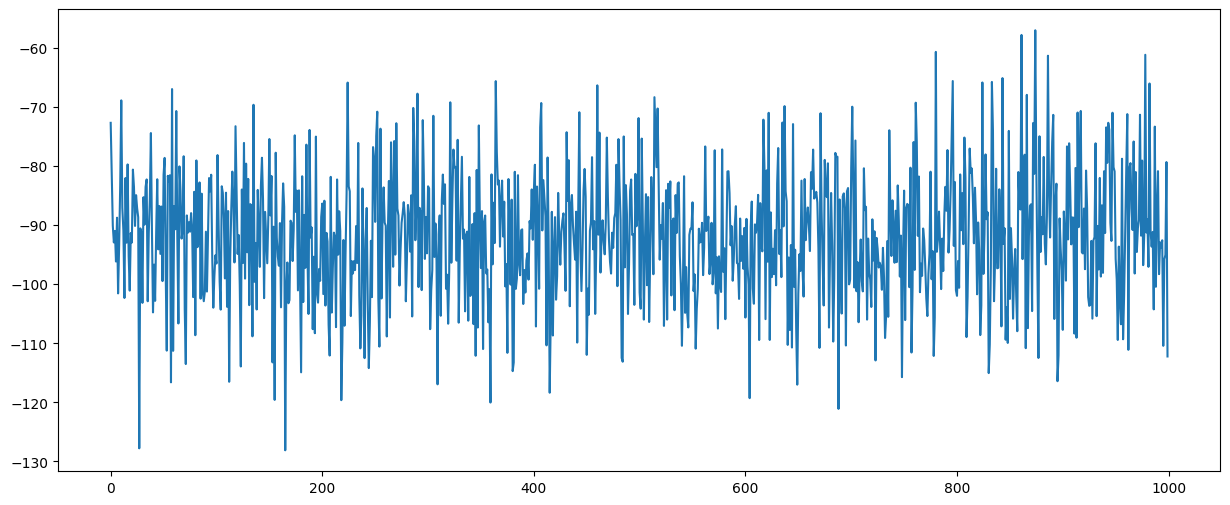

In [95]:
plt.figure(figsize = (15, 6))
plt.plot(COGS)
plt.show()

In [96]:
COGS.mean() , COGS.std()

(-91.82249990686553, 10.950212751391215)

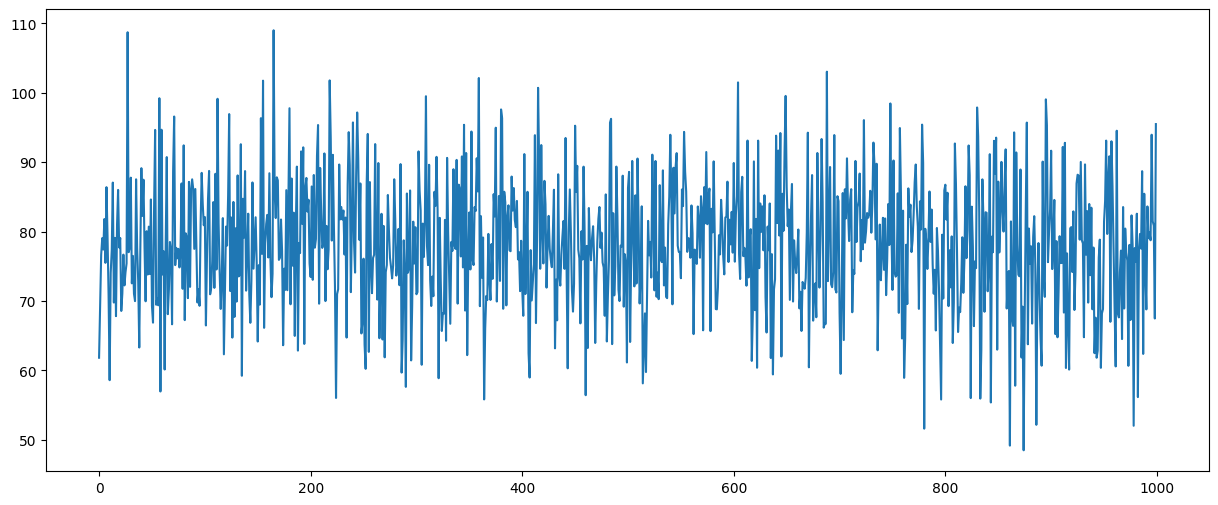

In [97]:
Gross_profit = rev + COGS

plt.figure(figsize = (15, 6))
plt.plot(Gross_profit)
plt.show()

In [98]:
min(Gross_profit) , max(Gross_profit), Gross_profit.mean(), Gross_profit.std()

(48.49547665281062, 109.00299379092661, 78.12290128442805, 9.316478975067183)

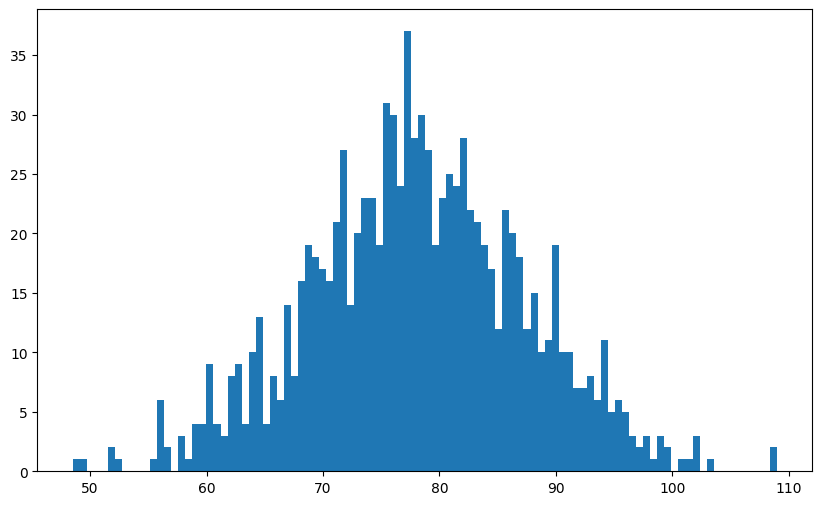

In [99]:
plt.figure(figsize = (10, 6))
plt.hist(Gross_profit, bins = 100)
plt.show()

# Monte Carlo - Forcasting stocks price

In [100]:
data = pd.DataFrame()
data['PG'] =  yf.download(t, start = '2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [101]:
log_returns = np.log(1 + data.pct_change())

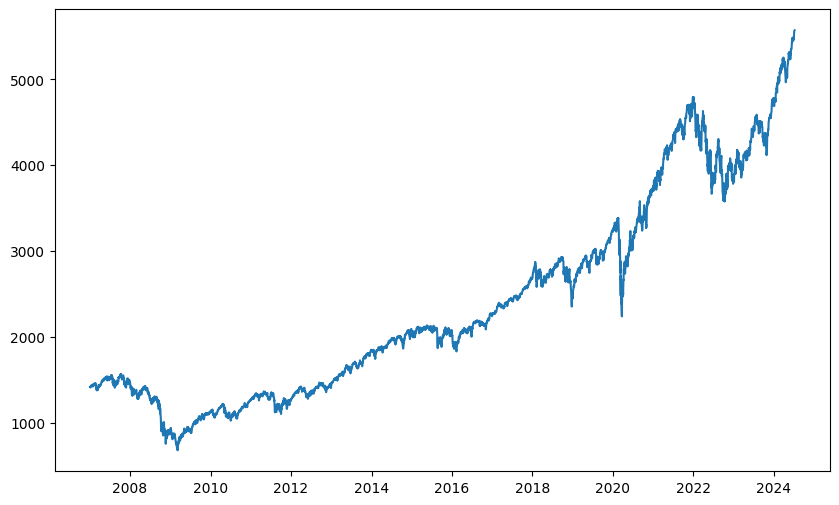

In [102]:
plt.figure(figsize = (10, 6))
plt.plot(data)
plt.show()

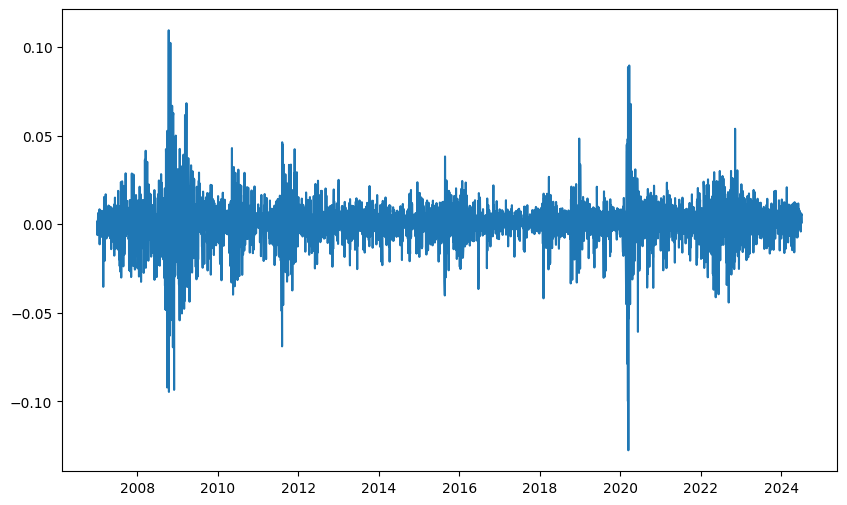

In [103]:
plt.figure(figsize = (10, 6))
plt.plot(log_returns)
plt.show()

In [104]:
u = log_returns.mean()
var =  log_returns.var()

In [105]:
drift  =  u - (0.5 * var)

In [106]:
stdev  = log_returns.std()

In [107]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [108]:
x = np.random.rand(10, 2)
x

array([[0.34078735, 0.35587868],
       [0.88517921, 0.47733112],
       [0.72468094, 0.14386373],
       [0.79362561, 0.32047915],
       [0.70136132, 0.78564822],
       [0.02691214, 0.4284417 ],
       [0.17502937, 0.22863607],
       [0.93002553, 0.37820646],
       [0.49915256, 0.48789313],
       [0.8722741 , 0.46617299]])

In [109]:
norm.ppf(x)

array([[-0.41031525, -0.36949692],
       [ 1.20128263, -0.05685308],
       [ 0.59680418, -1.06312016],
       [ 0.81906598, -0.46635935],
       [ 0.52831984,  0.79141207],
       [-1.9282481 , -0.18034288],
       [-0.93447535, -0.74334615],
       [ 1.47598122, -0.31019468],
       [-0.00212423, -0.03035207],
       [ 1.1372069 , -0.0848936 ]])

In [110]:
z = norm.ppf(np.random.rand(10, 2))

In [111]:
t_interval = 1000
iteration = 10

In [112]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_interval, iteration)))

In [113]:
s0 = data.iloc[-1]
s0

PG    5572.850098
Name: 2024-07-08 00:00:00, dtype: float64

In [114]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
price_list[0] = s0
price_list

array([[5572.85009766, 5572.85009766, 5572.85009766, ..., 5572.85009766,
        5572.85009766, 5572.85009766],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [116]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [117]:
price_list

array([[ 5572.85009766,  5572.85009766,  5572.85009766, ...,
         5572.85009766,  5572.85009766,  5572.85009766],
       [ 5558.78044866,  5531.11836579,  5573.24544175, ...,
         5420.57089564,  5673.93859904,  5623.16998221],
       [ 5550.67414507,  5604.40676393,  5535.51450809, ...,
         5496.13799718,  5605.40127162,  5683.77006438],
       ...,
       [ 5824.64937977,  7282.30828979,  6989.2210587 , ...,
        12073.78852243,  6288.13590897,  8247.80654913],
       [ 5830.24479071,  7128.05624306,  6927.47633762, ...,
        12113.24906106,  6164.93149028,  8334.5553849 ],
       [ 5886.06126241,  6985.10411236,  6937.54035223, ...,
        11989.14141252,  6215.91967376,  8319.16378826]])

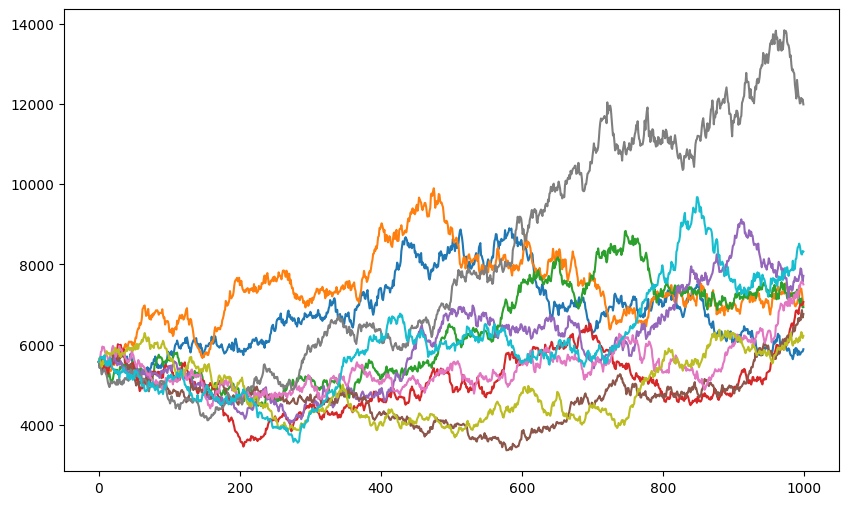

In [118]:
plt.figure(figsize = (10, 6))
plt.plot(price_list)
plt.show()

# Monte Carlo - Black-Scholes-Merton

In [434]:
# S : Strock Price
# K : Stike Price
# r : risk free rate
# stdev : standard deviation
# T : Time Horizon

def black_scholes_merton_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    call_price = S0 * N_d1 - K * np.exp(-r * T) * N_d2
    
    return call_price

In [435]:
import pandas as pd
import yfinance as yf

data = pd.DataFrame()
ticker = 'PG'
data['PG'] = yf.download(ticker, start='2007-01-01', end='2017-03-21')['Adj Close']


[*********************100%%**********************]  1 of 1 completed


In [437]:
S = data.iloc[-1]['PG']
log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5

# Example usage:
S0 = S  # Current stock price
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
sigma = stdev['PG'] # Volatility
T = 1.0    # Time to expiration (in years)

option_price = black_scholes_merton_call(S0, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")

The estimated price of the European call option is: 4.75


In [427]:
import numpy as np
from scipy.stats import norm

def black_scholes_merton_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    call_price = S0 * N_d1 - K * np.exp(-r * T) * N_d2
    
    return call_price

# Example usage with corrected access to sigma from stdev
S = data.iloc[-1]['PG']  # Current stock price, adjust 'PG' to your specific column name
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
sigma = stdev.iloc[0]  # Volatility, access by position using .iloc
T = 1.0    # Time to expiration (in years)

option_price = black_scholes_merton_call(S, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")


The estimated price of the European call option is: 4.75


# Euler Descretization

In [428]:
import numpy as np

# Function to calculate d1 and d2 for BSM model
def calculate_d1_d2(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Function to simulate option price using Monte Carlo simulation
def monte_carlo_option_price(S0, K, r, sigma, T, num_paths=10000):
    # Generate random normal variables for Monte Carlo simulation
    z = np.random.randn(num_paths)
    
    # Simulate stock prices at maturity (T)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # Calculate option payoff
    payoff = np.maximum(ST - K, 0)
    
    # Discounted expected payoff
    discounted_payoff = np.exp(-r * T) * np.mean(payoff)
    
    return discounted_payoff

# Example usage
# S0 = 100   # Current stock price
# K = 105    # Strike price
# r = 0.05   # Risk-free interest rate
# sigma = 0.2 # Volatility
# T = 1    # Time to expiration (in years)

# Example usage: 
S0 = S  # Current stock price
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
sigma = stdev.iloc[0]# Volatility
T = 1.0    # Time to expiration (in years)

option_price = monte_carlo_option_price(S0, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")

The estimated price of the European call option is: 4.79


In [438]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals
iteration = 10000

In [439]:
Z = np.random.standard_normal((t_intervals + 1 , iteration))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [440]:
stdev = np.array([0.17658467685887308])

In [441]:
# for t in range(1 ,  t_intervals + 1):
#     S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

for t in range(1 ,  t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

p = np.maximum(S[-1] - k , 0)
call_option = np.exp(-r * T) * np.sum(p)/ iteration

call_option

0.13654351009556245

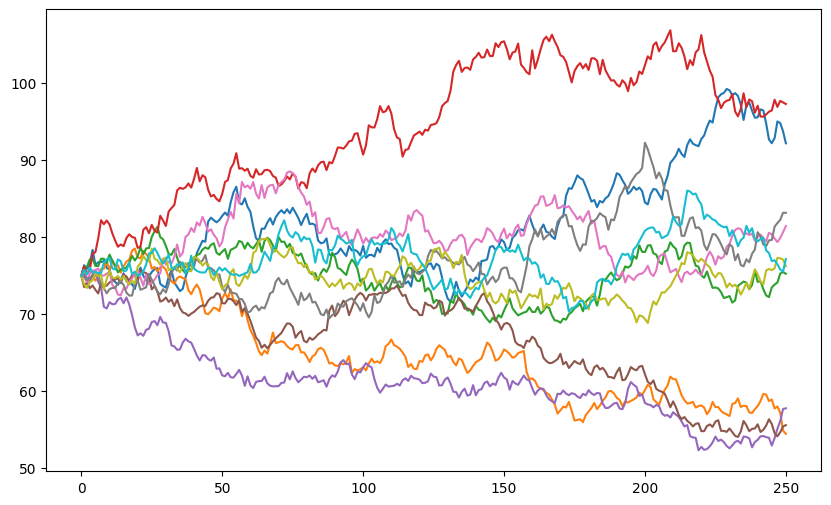

In [433]:
plt.figure(figsize = (10, 6))
plt.plot(S[: , :10])
plt.show()

In [398]:
p = np.maximum(S[-1] - k , 0)

In [399]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [400]:
call_option = np.exp(-r * T) * np.sum(p)/ iteration

In [401]:
call_option

0.12067265478433713

In [340]:
import numpy as np

# Function to calculate d1 and d2 for BSM model
def calculate_d1_d2(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Function to simulate option price using Monte Carlo simulation
def monte_carlo_option_price(S0, K, r, sigma, T, num_paths=10000):
    # Generate random normal variables for Monte Carlo simulation
    z = np.random.randn(num_paths)
    
    # Simulate stock prices at maturity (T)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # Calculate option payoff
    payoff = np.maximum(ST - K, 0)
    
    # Discounted expected payoff
    discounted_payoff = np.exp(-r * T) * np.mean(payoff)
    
    return discounted_payoff

# Example usage
# S0 = 100   # Current stock price
# K = 105    # Strike price
# r = 0.05   # Risk-free interest rate
# sigma = 0.2 # Volatility
# T = 1    # Time to expiration (in years)

# Example usage:
S0 = S  # Current stock price
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
#sigma = stdev # Volatility
T = 1.0    # Time to expiration (in years)
sigma = stdev[0]
option_price = monte_carlo_option_price(S0, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")

The estimated price of the European call option is: 6.48


In [341]:
import numpy as np

# Function to calculate d1 and d2 for BSM model
def calculate_d1_d2(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Function to simulate option price using Monte Carlo simulation
def monte_carlo_option_price(S0, K, r, sigma, T, num_paths=10000):
    # Generate random normal variables for Monte Carlo simulation
    z = np.random.randn(num_paths)
    
    # Simulate stock prices at maturity (T)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    # Calculate option payoff
    payoff = np.maximum(ST - K, 0)
    
    # Discounted expected payoff
    discounted_payoff = np.exp(-r * T) * np.mean(payoff)
    
    return discounted_payoff

# Example usage
# S0 = 100   # Current stock price
# K = 105    # Strike price
# r = 0.05   # Risk-free interest rate
# sigma = 0.2 # Volatility
# T = 1    # Time to expiration (in years)

# Example usage:
S0 = S  # Current stock price
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
#sigma = stdev # Volatility
T = 1.0    # Time to expiration (in years)

option_price = monte_carlo_option_price(S0, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")


The estimated price of the European call option is: 6.45


In [302]:
sigma

0.176585

In [304]:
# Example usage
S0 = 74.92   # Current stock price
K = 78    # Strike price
r = 0.025   # Risk-free interest rate
sigma =  # Volatility
T = 1    # Time to expiration (in years)

option_price = monte_carlo_option_price(S0, K, r, sigma, T)
print(f"The estimated price of the European call option is: {option_price:.2f}")

The estimated price of the European call option is: 4.77


In [193]:
stdev

PG    0.176585
dtype: float64